In [6]:
#Preparation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [54]:
#The class for plot the diagram

class plot_error_surface(object):
    
    #Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)
        Z = np.zeros((30, 30))
        count1 = 0
        
        self.x = X.numpy()
        self.y = Y.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        
        self.Z = Z
        self.b = b
        self.w = w
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection = '3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1, cmap = 'viridis', edgecolor = 'yellow')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            
            plt.figure()
            plt.title('Cost/Total Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
            
    #Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)
        
    #Plot diagram
    def final_plot(self):
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, c = 'r', marker = '*')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
        
    #Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label = 'training points')
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = 'estimated line')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' +str(self.n))
        
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = '*')
        plt.title('Total Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

In [55]:
#Make some data

In [56]:
import torch

In [57]:
# Create f(X) with a slope of 1 and a bias of -1

X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = 1 * X - 1

In [58]:
#Add noise
Y = f + 0.1 * torch.randn(X.size())

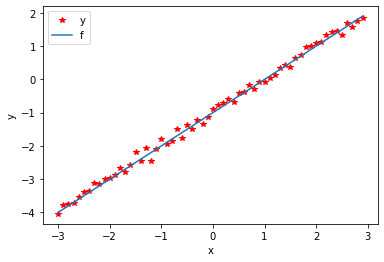

In [59]:
# Plot out the line and the points with noise

plt.plot(X.numpy(), Y.numpy(), 'r*', label = 'y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [60]:
#Create the model and cost function(total loss)

In [61]:
#define the forward function
def forward(x):
    return w * x + b

In [62]:
def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

In [63]:
#Create a  plot_error_surfaces object to visualize the data space and the parameter space during training:

<Figure size 432x288 with 0 Axes>

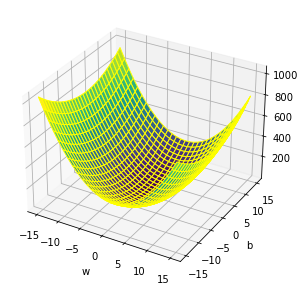

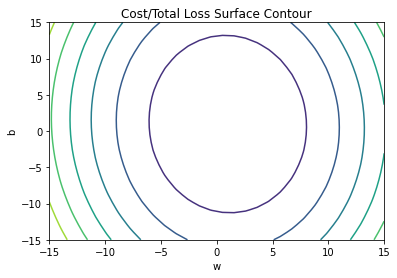

In [64]:
# Create plot_error_surfaces for viewing the data

get_surface = plot_error_surface(15, 15, X, Y, 30)

In [67]:
# Define the parameters w, b for y = wx + b

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

In [68]:
# Define learning rate and create an empty list for containing the loss for each iteration.

lr = 0.1
LOSS = []

In [69]:
#define train_model

In [70]:
# The function for training the model

def train_model(iter):
    for epoch in range(iter):
        #Make prediction
        Yhat = forward(X)
        
        #Calculate the loss
        loss = criterion(Yhat, Y)
        
        #Section for plotting
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.data.tolist())
        if epoch % 3 == 0:
            get_surface.plot_ps()
            
        #Store the loss in LOSS
        LOSS.append(loss)
        
        #backwardpass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        #update parameters slope and bias
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        
        w.grad.data.zero_()
        b.grad.data.zero_()

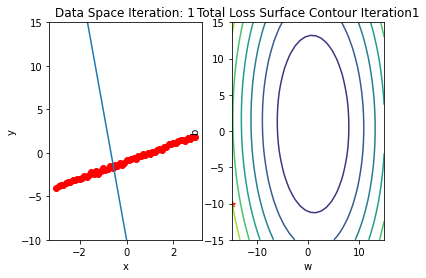

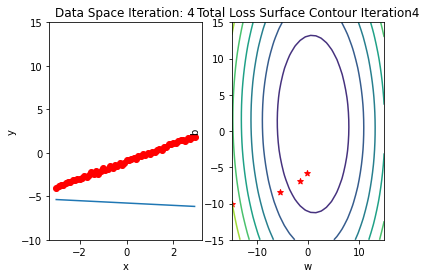

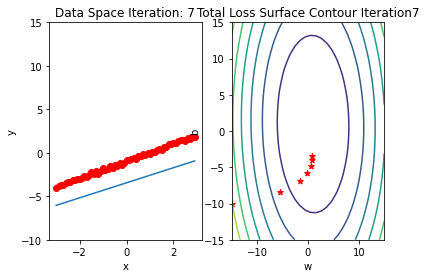

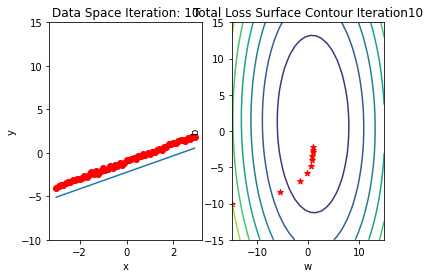

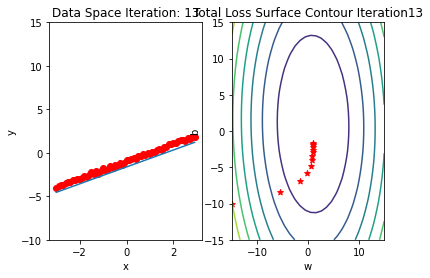

In [71]:
# Train the model with 15 iterations

train_model(15)

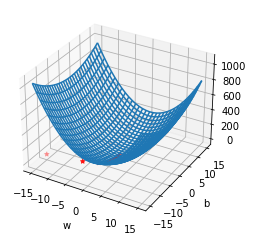

Text(23.875, 0.5, 'Cost')

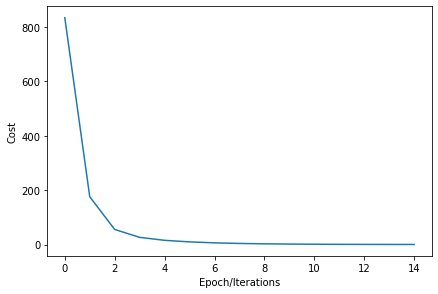

In [72]:
# Plot out the Loss Result

get_surface.final_plot()
plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

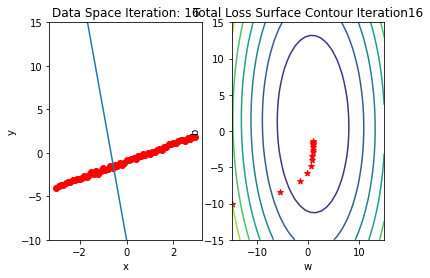

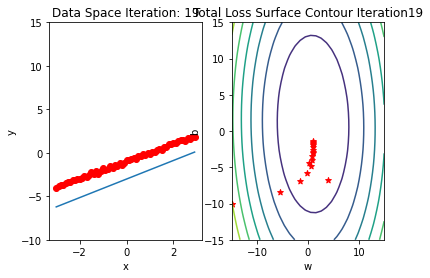

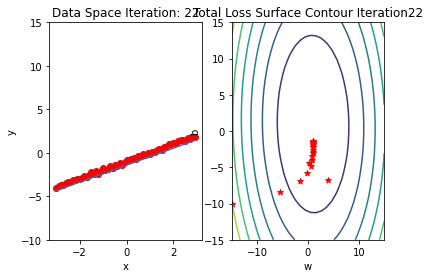

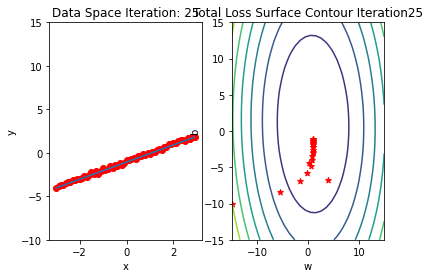

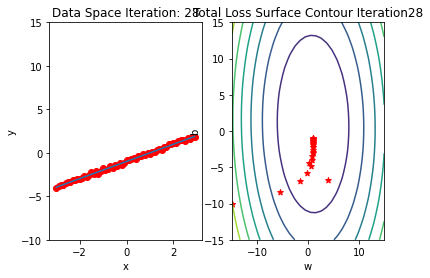

In [73]:
# Practice: train and plot the result with lr = 0.2 and the following parameters

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
lr = 0.2
LOSS2 = []

# The function for training the model

def my_train_model(iter):
    for epoch in range(iter):
        #Make prediction
        Yhat = forward(X)
        
        #Calculate the loss
        loss = criterion(Yhat, Y)
        
        #Section for plotting
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.data.tolist())
        if epoch % 3 == 0:
            get_surface.plot_ps()
            
        #Store the loss in LOSS
        LOSS2.append(loss)
        
        #backwardpass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        #update parameters slope and bias
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        
        w.grad.data.zero_()
        b.grad.data.zero_()
        

my_train_model(15)

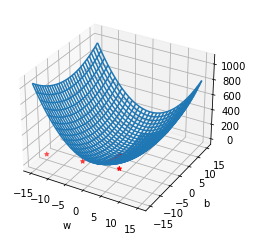

Text(23.875, 0.5, 'Cost')

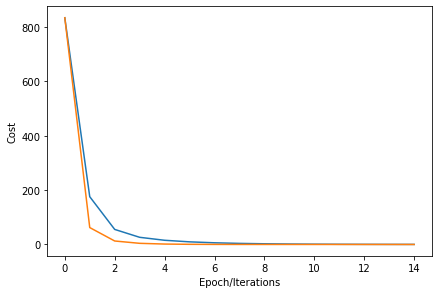

In [74]:
# Plot out the Loss Result

get_surface.final_plot()
plt.plot(LOSS, label = 'LOSS')
plt.plot(LOSS2, label = 'LOSS2')
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")